In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.stats as st

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.reset_option('all')

In [117]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.brain_observatory.drifting_gratings import DriftingGratings



boc = BrainObservatoryCache()

In [118]:
exp_test = boc.get_ophys_experiments(cre_lines=['Vip-IRES-Cre'], stimuli=['drifting_gratings'], 
                                     targeted_structures=['VISp'])
print("Experiments for test: %d\n" % (len(exp_test)))

Experiments for test: 17



In [119]:
session_id0 = exp_test[0]['id']
print(session_id0)

662361096


In [120]:
data_set0 = boc.get_ophys_experiment_data(session_id0)
pprint.pprint(data_set0.get_metadata())

{'age_days': 123,
 'cre_line': 'Vip-IRES-Cre/wt',
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.1',
 'excitation_lambda': '910 nanometers',
 'experiment_container_id': 662361094,
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'imaging_depth_um': 275,
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': 662361096,
 'pipeline_version': '3.0',
 'session_start_time': datetime.datetime(2018, 2, 9, 16, 19, 45),
 'session_type': 'three_session_A',
 'sex': 'female',
 'specimen_name': 'Vip-IRES-Cre;Ai148-362734',
 'targeted_structure': 'VISp'}


In [121]:
#Stimulus Table
drifting_gratings_table0 = data_set0.get_stimulus_table("drifting_gratings")
drifting_gratings_table0

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,180.0,0.0,735,795
1,4.0,180.0,0.0,826,886
2,1.0,90.0,0.0,916,976
3,NaN,NaN,1.0,1007,1067
4,4.0,90.0,0.0,1098,1157
5,4.0,90.0,0.0,1188,1248
6,4.0,315.0,0.0,1279,1338
7,1.0,45.0,0.0,1369,1429
8,1.0,270.0,0.0,1460,1519
9,2.0,270.0,0.0,1550,1610


In [122]:
vip_inter_ecs = boc.get_experiment_containers(targeted_structures=['VISp'],cre_lines=['Vip-IRES-Cre'])
# Download cells for a set of experiments and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))

total cells: 63251


In [123]:
# find direction selective cells in VISp
vip_inter_ec_ids = [ ec['id'] for ec in vip_inter_ecs ]
vip_inter_cells = cells[cells['experiment_container_id'].isin(vip_inter_ec_ids)]
print("VIP Interneuron cells: %d" % len(vip_inter_cells))

VISp cells: 352


In [124]:
# significant response to drifting gratings stimulus
sig_cells = vip_inter_cells[vip_inter_cells['p_dg'] < 0.05]
print("cells with sig. response to drifting gratings: %d" % len(sig_cells))

cells with sig. response to drifting gratings: 151


In [125]:
# direction selective cells
dsi_cells = sig_cells[(sig_cells['g_dsi_dg'] > 0.9)]
print("direction-selective cells: %d" % len(dsi_cells))

direction-selective cells: 19


In [126]:
# find experiment containers for those cells
dsi_ec_ids = dsi_cells['experiment_container_id'].unique()
print("total dsi experiment containers: %d" % len(dsi_ec_ids))

total dsi experiment containers: 10


In [127]:
# Download the ophys experiments containing the drifting gratings stimulus for VISp experiment containers
dsi_exps = boc.get_ophys_experiments(experiment_container_ids=dsi_ec_ids, stimuli=[stim_info.DRIFTING_GRATINGS])
print("VIP Interneuron drifting gratings ophys experiments: %d" % len(dsi_exps))

VISp drifting gratings ophys experiments: 10


In [128]:
print("Example ophys experiment:")
pprint.pprint(dsi_exps[0])

Example ophys experiment:
{'acquisition_age_days': 111,
 'cre_line': 'Vip-IRES-Cre',
 'donor_name': '357433',
 'experiment_container_id': 657078117,
 'fail_eye_tracking': True,
 'id': 657078119,
 'imaging_depth': 175,
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'session_type': 'three_session_A',
 'specimen_name': 'Vip-IRES-Cre;Ai148-357433',
 'targeted_structure': 'VISp'}


In [ ]:
#dg_tuning_curve(4, dsi_cells)

C:\Users\rahman.mustapha\Anaconda3\lib\site-packages\allensdk\brain_observatory\drifting_gratings.py:306: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  peak_dsi = self.peak.ix[dsi_cells]


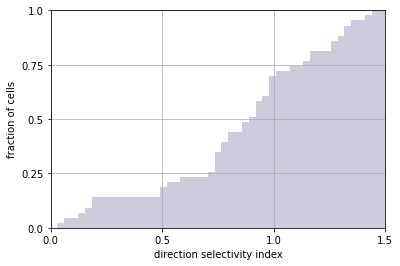

In [133]:
a = dg.plot_direction_selectivity()
a

C:\Users\rahman.mustapha\Anaconda3\lib\site-packages\allensdk\brain_observatory\drifting_gratings.py:284: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  peak_osi = self.peak.ix[osi_cells]


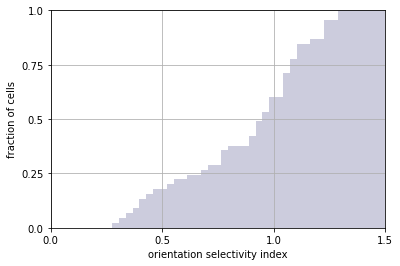

In [134]:
b = dg.plot_orientation_selectivity()
b

In [136]:
dg.peak

,ori_dg,tf_dg,reliability_dg,osi_dg,dsi_dg,peak_dff_dg,ptest_dg,p_run_dg,run_modulation_dg,cv_os_dg,cv_ds_dg,tf_index_dg,cell_specimen_id
0,7,4,-0.00496038,1.44034,0.29326,2.79243,7.68693e-06,NaN,NaN,0.682931,0.0467744,0.310569,517398175
1,2,1,0.0770236,0.336991,0.635525,2.13426,2.42844e-06,NaN,NaN,0.154721,0.573217,0.299823,517398178
2,3,1,0.0538209,0.386067,0.0908587,1.45548,5.2338e-07,NaN,NaN,0.291387,0.233142,0.390244,517398701
3,3,1,0.0424262,0.60826,1.07671,1.38679,0.00348353,NaN,NaN,0.143278,0.501297,0.306692,589152368
4,7,1,0.196758,0.399449,0.495567,4.24363,2.10902e-18,NaN,NaN,0.308888,0.206811,0.431385,517398711
5,1,1,0.214992,1.0966,0.75637,30.0741,1.28372e-29,NaN,NaN,0.830483,0.740479,0.380826,517397486
6,1,2,0.0168593,1.82347,0.765423,2.15521,4.03552e-05,NaN,NaN,0.869428,0.731588,0.309011,589153606
7,7,1,0.0206159,0.839439,0.865263,1.32914,0.00362732,NaN,NaN,0.485379,0.32369,0.338879,517397741
8,2,4,-0.00432279,0.750972,1.36999,1.83764,0.00393887,NaN,NaN,0.468024,0.554518,0.300166,517397738
9,3,4,-0.00230256,1.16676,0.765842,7.88586,0.000320072,NaN,NaN,0.83962,0.641911,0.33379,517397610


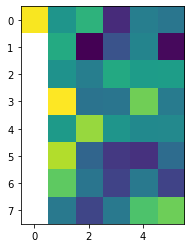

In [142]:

plt.imshow(dg.response[:,:,92,0])

#8 diretions
# 5 tfs + 1
#213 cells + 1 runnins speed is last
#1:mean 2: standard deviation 3: p/significance 

In [ ]:
neuron_number = 1

dsi_cell = dsi_cells.iloc[neuron_number]
    
cell_exp = boc.get_ophys_experiments(cell_specimen_ids=[dsi_cell['cell_specimen_id']],
                                         stimuli=[stim_info.DRIFTING_GRATINGS])[0]
data_set = boc.get_ophys_experiment_data(cell_exp['id'])

dg = DriftingGratings(data_set)
dg_peak = dg.peak

In [ ]:
vis_cells = (dg_peak.ptest_dg < 0.05) &  (dg_peak.peak_dff_dg > 3)
osi_cells = vis_cells & (dg_peak.osi_dg > 0.5) & (dg_peak.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg_peak.dsi_dg > 0.5) & (dg_peak.dsi_dg <= 1.5)

# # 2-d tf vs. ori histogram
# # tfval = 0 is used for the blank sweep, so we are ignoring it here
# os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
# ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

# # for i,trial in dg_peak[osi_cells].iterrows():
#  #   os[trial.ori_dg, trial.tf_dg-1] += 1

# for i,trial in dg_peak[dsi_cells].iterrows():
#     if i < 20 :
#         print(trial.ori_dg)
#         print(trial.tf_dg-1)


# max_count = max(os.max(), ds.max())
# min_count = min(os.min(), ds.min())

# #  (Response(d,tf) – Response(Blank)) / (mean Response(all d and tf) + R(Blank))

# fig, (ax1, ax2) = plt.subplots(1,2)


# # plot direction selectivity
# im = ax1.imshow(ds, clim=[0,max_count], cmap='RdBu_r', interpolation='nearest')
# ax1.set_xlabel('temporal frequency')
# ax1.set_ylabel('direction')
# ax1.set_xticks(np.arange(len(dg.tfvals)-1))
# ax1.set_xticklabels(dg.tfvals[1:])
# ax1.set_yticks(np.arange(len(dg.orivals)))
# ax1.set_yticklabels(dg.orivals)
# ax1.set_title('direction selective cells')

# # plot orientation selectivity
# im = ax2.imshow(os, clim=[0,max_count], cmap='RdBu_r', interpolation='nearest')
# ax2.set_xlabel('temporal frequency')
# ax2.set_ylabel('orientation')
# ax2.set_xticks(np.arange(len(dg.tfvals)-1))
# ax2.set_xticklabels(dg.tfvals[1:])
# ax2.set_yticks(np.arange(len(dg.orivals)))
# ax2.set_yticklabels(dg.orivals)
# ax2.set_title('orientation selective cells')

# # plot a colorbar
# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.set_ticks(np.arange(min_count, max_count, 2)+0.5)
# cbar.set_ticklabels(np.arange(min_count, max_count, 2, dtype=int))

#p value next to title


#ORs = dg_table['Orientation'].unique()
#TFs = dg_table['temporal_frequency'].unique()

dg_table = data_set.get_stimulus_table("drifting_gratings")
dg_columns = list(dg_table.columns)
dg_mean_sweep_events = np.zeros(len(dg_table),  dg_table.size)

#p_vals = chisq_from_stim_table(dg_table, dg_columns, dg_mean_sweep_events, num_shuffles=1000, verbose=False)
#print('P-Values are: ' + str(p_vals))

In [75]:
def get_unique_orientations(DG_table):

    pre_ORIs = DG_table['orientation'].unique() 
    ORIs = [x for x in pre_ORIs if np.isnan(x) == False]
    return ORIs

get_unique_orientations(dg_table)

[270.0, 315.0, 135.0, 180.0, 225.0, 45.0, 90.0, 0.0]

In [106]:
sorted_dg_table = dg_table.sort_values(by=['temporal_frequency','orientation'])
sorted_dg_table

,temporal_frequency,orientation,blank_sweep,start,end
23,1.0,0.0,0.0,2823,2883
222,1.0,0.0,0.0,50597,50657
230,1.0,0.0,0.0,51320,51379
252,1.0,0.0,0.0,53306,53366
267,1.0,0.0,0.0,54661,54720
310,1.0,0.0,0.0,58543,58603
362,1.0,0.0,0.0,63241,63300
363,1.0,0.0,0.0,63331,63391
387,1.0,0.0,0.0,65498,65558
439,1.0,0.0,0.0,98185,98245


In [76]:
def get_unique_temporal_frequencies(DG_table):

    pre_TFs = DG_table['temporal_frequency'].unique()
    TFs = [x for x in pre_TFs if np.isnan(x) == False]
    return TFs

get_unique_temporal_frequencies(dg_table)

[2.0, 8.0, 1.0, 15.0, 4.0]

In [103]:

def get_conditon_trials(DG_table, ori, tf):
    for ori_idx, current_ori in enumerate(get_unique_orientations(DG_table)):
        for TF_idx, current_tf in enumerate(get_unique_temporal_frequencies(DG_table)):
            trials_in_condition = (DG_table['orientation'] == ori) & (DG_table['temporal_frequency'] == tf)
        
    condition_trial_indices = np.argwhere(trials_in_condition)
     
    just_indices = []
    for sublist in condition_trial_indices:
        just_indices.append(sublist[0])
        
    return just_indices

get_conditon_trials(dg_table, 270, 4)

[40, 118, 219, 272, 306, 328, 347, 350, 357, 366, 413, 511, 530, 541, 587]

In [96]:
def get_blank_trials(DG_table):
    for ori_idx, current_ori in enumerate(get_unique_orientations(DG_table)):
        for TF_idx, current_tf in enumerate(get_unique_temporal_frequencies(DG_table)):
            trials_in_condition = (np.isnan(DG_table['orientation'])) & (np.isnan(DG_table['temporal_frequency']))
        
    condition_trial_indices = np.argwhere(trials_in_condition)
     
    just_indices = []
    for sublist in condition_trial_indices:
        just_indices.append(sublist[0])
        
    return just_indices

get_blank_trials(dg_table)

[28,
 30,
 34,
 56,
 67,
 95,
 99,
 120,
 127,
 134,
 165,
 197,
 212,
 229,
 269,
 299,
 339,
 348,
 365,
 390,
 408,
 492,
 507,
 512,
 517,
 540,
 569,
 582,
 602,
 611]

In [ ]:
dg_tuning_curve(7, dsi_cells)

In [ ]:
def chisq_from_stim_table(stim_table,
                          columns,
                          mean_sweep_events,
                          num_shuffles=1000,
                          verbose=False):
    #  stim_table is a pandas DataFrame with len = num_sweeps
    #  columns is a list of column names that define the categories (e.g. ['Ori','Contrast'])
    #  mean_sweep_events is a numpy array with shape (num_sweeps,num_cells)
    
    sweep_categories = stim_table_to_categories(stim_table,columns,verbose=verbose)
    p_vals = compute_chi_shuffle(mean_sweep_events,sweep_categories,num_shuffles=num_shuffles)
    
    return p_vals

def compute_chi_shuffle(mean_sweep_events,
                        sweep_categories,
                        num_shuffles=1000):

    #  mean_sweep_events is a numpy array with shape (num_sweeps,num_cells)
    #  sweep_conditions is a numpy array with shape (num_sweeps)
    #       sweep_conditions gives the category label for each sweep
    
    (num_sweeps,num_cells) = np.shape(mean_sweep_events) 
    
    assert len(sweep_categories) == num_sweeps
    
    sweep_categories_dummy = make_category_dummy(sweep_categories)
    
    expected = compute_expected(mean_sweep_events,sweep_categories_dummy)
    observed = compute_observed(mean_sweep_events,sweep_categories_dummy)
    chi_actual = compute_chi(observed,expected)
    
    chi_shuffle = np.zeros((num_cells,num_shuffles))
    for ns in range(num_shuffles):
        #print 'shuffle ' + str(ns+1) + ' of ' + str(num_shuffles)
        
        shuffle_sweeps = np.random.choice(num_sweeps,size=(num_sweeps,))
        shuffle_sweep_events = mean_sweep_events[shuffle_sweeps]
        
        shuffle_expected = compute_expected(shuffle_sweep_events,sweep_categories_dummy)
        shuffle_observed = compute_observed(shuffle_sweep_events,sweep_categories_dummy)
        
        chi_shuffle[:,ns] = compute_chi(shuffle_observed,shuffle_expected)
    
    p_vals = np.mean(chi_actual.reshape(num_cells,1)<chi_shuffle,axis=1)
    
    return p_vals

def stim_table_to_categories(stim_table,
                             columns,
                             verbose=False):
    # get the categories for all sweeps with each unique combination of 
    #   parameters in 'columns' being one category
    # sweeps with non-finite values in ANY column (e.g. np.NaN) are labeled 
    #   as blank sweeps (category = -1)
    
    num_sweeps = len(stim_table)
    num_params = len(columns)
    
    unique_params = []
    options_per_column = []
    max_combination = 1
    for column in columns:
        column_params = np.unique(stim_table[column].values)
        column_params = column_params[np.isfinite(column_params)]
        unique_params.append(column_params)
        options_per_column.append(len(column_params))
        max_combination*=len(column_params)

    category = 0
    sweep_categories = -1*np.ones((num_sweeps,))
    curr_combination = np.zeros((num_params,),dtype=np.int)
    options_per_column = np.array(options_per_column).astype(np.int)
    all_tried = False
    while not all_tried:
        
        matches_combination = np.ones((num_sweeps,),dtype=np.bool)
        for i_col,column in enumerate(columns):
            param = unique_params[i_col][curr_combination[i_col]]
            matches_param = stim_table[column].values == param
            matches_combination *= matches_param
            
        if np.any(matches_combination):
            sweep_categories[matches_combination] = category
            if verbose:
                print ('Category ' + str(category))
                for i_col,column in enumerate(columns):
                    param = unique_params[i_col][curr_combination[i_col]]
                    print (column + ': ' + str(param))
            
            category+=1
              
        #advance the combination
        curr_combination = advance_combination(curr_combination,options_per_column)
        all_tried = curr_combination[0]==options_per_column[0]
    
    if verbose:    
        blank_sweeps = sweep_categories==-1
        print ('num blank: ' + str(blank_sweeps.sum()))
        
    return sweep_categories
    
def advance_combination(curr_combination,
                        options_per_column):
    
    num_cols = len(curr_combination)
    
    might_carry = True
    col = num_cols-1
    while might_carry:
        curr_combination[col] += 1
        if col==0 or curr_combination[col]<options_per_column[col]:
            might_carry = False
        else:
            curr_combination[col] = 0
            col-=1
            
    return curr_combination
    

def make_category_dummy(sweep_categories):
    #makes a dummy variable version of the sweep category list
    
    num_sweeps = len(sweep_categories)
    categories = np.unique(sweep_categories)
    num_categories = len(categories)
    
    sweep_category_mat = np.zeros((num_sweeps,num_categories),dtype=np.bool)
    for i_cat,category in enumerate(categories):
        category_idx = np.argwhere(sweep_categories==category)[:,0]
        sweep_category_mat[category_idx,i_cat] = True
    
    return sweep_category_mat

def compute_observed(mean_sweep_events,sweep_conditions):

    (num_sweeps,num_conditions) = np.shape(sweep_conditions)
    num_cells = np.shape(mean_sweep_events)[1]   
    
    observed_mat = (mean_sweep_events.T).reshape(num_cells,num_sweeps,1) * sweep_conditions.reshape(1,num_sweeps,num_conditions)
    observed = np.sum(observed_mat,axis=1)
    
    return observed
    
def compute_expected(mean_sweep_events,sweep_conditions):   
    
    num_conditions = np.shape(sweep_conditions)[1]
    num_cells = np.shape(mean_sweep_events)[1]
    
    sweeps_per_condition = np.sum(sweep_conditions,axis=0)
    events_per_sweep = np.mean(mean_sweep_events,axis=0)
    
    expected = sweeps_per_condition.reshape(1,num_conditions) * events_per_sweep.reshape(num_cells,1) 
    
    return expected

def compute_chi(observed,expected):

    chi = (observed - expected) ** 2 /expected
    chi = np.where(expected>0,chi,0.0)  
    return np.sum(chi,axis=1)

In [ ]:
def dg_tuning_curve(neuron_number, cell_array): 
    
    dsi_cell = cell_array.iloc[neuron_number]
    
    cell_exp = boc.get_ophys_experiments(cell_specimen_ids=[dsi_cell['cell_specimen_id']],
                                             stimuli=[stim_info.DRIFTING_GRATINGS])[0]
    data_set = boc.get_ophys_experiment_data(cell_exp['id'])

    dg = DriftingGratings(data_set)
    dg_peak = dg.peak

    vis_cells = (dg_peak.ptest_dg < 0.05) &  (dg_peak.peak_dff_dg > 3)
    osi_cells = vis_cells & (dg_peak.osi_dg > 0.5) & (dg_peak.osi_dg <= 1.5)
    dsi_cells = vis_cells & (dg_peak.dsi_dg > 0.5) & (dg_peak.dsi_dg <= 1.5)

    # 2-d tf vs. ori histogram
    # tfval = 0 is used for the blank sweep, so we are ignoring it here
    os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
    ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

   # for i,trial in dg_peak[osi_cells].iterrows():
     #   os[trial.ori_dg, trial.tf_dg-1] += 1

    for i,trial in dg_peak[dsi_cells].iterrows():
        if i < 20 :
            print(trial.ori_dg)
            print(trial.tf_dg-1)
        

    max_count = max(os.max(), ds.max())
    min_count = min(os.min(), ds.min())

  #  (Response(d,tf) – Response(Blank)) / (mean Response(all d and tf) + R(Blank))

    fig, (ax1, ax2) = plt.subplots(1,2)

    
    # plot direction selectivity
    im = ax1.imshow(ds, clim=[0,max_count], cmap='RdBu_r', interpolation='nearest')
    ax1.set_xlabel('temporal frequency')
    ax1.set_ylabel('direction')
    ax1.set_xticks(np.arange(len(dg.tfvals)-1))
    ax1.set_xticklabels(dg.tfvals[1:])
    ax1.set_yticks(np.arange(len(dg.orivals)))
    ax1.set_yticklabels(dg.orivals)
    ax1.set_title('direction selective cells')

    # plot orientation selectivity
    im = ax2.imshow(os, clim=[0,max_count], cmap='RdBu_r', interpolation='nearest')
    ax2.set_xlabel('temporal frequency')
    ax2.set_ylabel('orientation')
    ax2.set_xticks(np.arange(len(dg.tfvals)-1))
    ax2.set_xticklabels(dg.tfvals[1:])
    ax2.set_yticks(np.arange(len(dg.orivals)))
    ax2.set_yticklabels(dg.orivals)
    ax2.set_title('orientation selective cells')

    # plot a colorbar
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_ticks(np.arange(min_count, max_count, 2)+0.5)
    cbar.set_ticklabels(np.arange(min_count, max_count, 2, dtype=int))
    
    
    
    
    
    
    dg_table = data_set.get_stimulus_table("drifting_gratings")
    dg_table
    dg_columns = list(dg_table.columns)
    dg_mean_sweep_events = np.zeros(len(dg_table),  dg_table.size)

    p_vals = chisq_from_stim_table(dg_table, dg_columns, dg_mean_sweep_events, num_shuffles=1000, verbose=False)
    print('P-Values are: ' + str(p_vals))
    
    
    

    plt.savefig('neuron' + str(neuron_number) + '_tuning_graph.png')
    plt.show()
